### Цель задания: определить стоимость страховки пациента

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
label_encoder = LabelEncoder()
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].apply(label_encoder.fit_transform)
enc = OneHotEncoder()
X_cat = enc.fit_transform(df[['sex', 'smoker', 'region']]).toarray()
X_num = df[['age', 'bmi', 'children']].values
X = np.concatenate([X_num, X_cat], axis=1)
df = df.assign(expenses=df['bmi'] )
y = df['expenses'].values

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.c_[np.ones(X.shape[0]), X]

In [5]:
def mserror(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [6]:
def normal_equation(X, y):
    w = np.linalg.pinv(X.T @ X) @ X.T @ y
    return w

In [7]:
def gradient_descent(X, y, w_init, eta=0.01, max_iter=1e4, min_weight_dist=1e-8, verbose=False):
    w = w_init
    for _ in range(int(max_iter)):
        grad = 2 * X.T @ (X @ w - y) / len(y)
        w -= eta * grad
        if np.linalg.norm(eta * grad) < min_weight_dist:
            break
    return w

In [8]:
w_start = np.zeros(X.shape[1])
w = normal_equation(X, y)
y_pred = X @ w
rmse_val = mean_squared_error(y, y_pred, squared=False)
mse_val = mean_squared_error(y, y_pred, squared=True)
print(f'RMSE: {rmse_val}')
print(f'MSE: {mse_val}')
print(w)

RMSE: 0.0050590886027130815
MSE: 2.5594377490101402e-05
[ 3.06633969e+01  9.02056208e-17  6.09590764e+00 -1.04083409e-16
 -1.93195318e-01 -1.88192173e-01 -1.94222691e-03 -1.95788889e-03
  4.49313101e-03  4.66354241e-03  5.23837062e-03  4.23788370e-03]


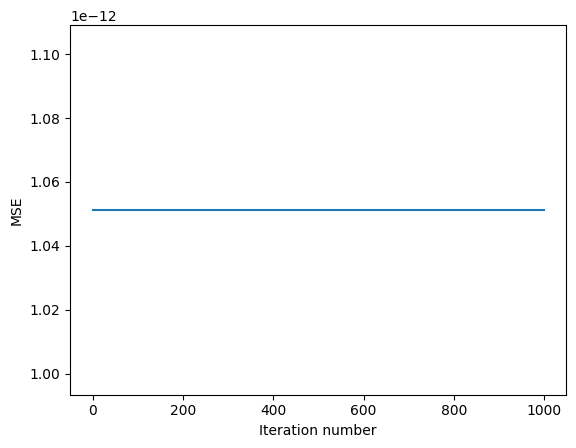

In [9]:
errors = []
max_iter = 1000
w = gradient_descent(X, y, w_start, eta=0.01, max_iter=max_iter)
for i in range(int(max_iter)):
  y_pred = X @ w
  errors.append(mean_squared_error(y, y_pred))
plt.plot(range(len(errors)), errors)
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.show()